In [3]:
from keras.models import load_model

In [4]:
import sys
import numpy as np

In [5]:
sys.path.append("/home/lowik/carvana/")

In [6]:
from carvana.metrics import dice_coef_binary, class_weighted_binary_accuracy
from carvana.losses import class_weighted_binary_crossentropy, wrapped_partial

In [7]:
weights = np.array([1, 3.75], dtype=np.float32)
weights /= np.sum(weights)
weighted_bce_loss = wrapped_partial(class_weighted_binary_crossentropy,
                                    weights=weights)
weighted_acc = wrapped_partial(class_weighted_binary_accuracy,
                               weights=weights)

In [8]:
model = load_model("../data/logs.weights.11-0.9841.hdf5", custom_objects={"class_weighted_binary_crossentropy": weighted_bce_loss, "class_weighted_binary_accuracy": weighted_acc, "dice_coef_binary": dice_coef_binary})

In [9]:
from PIL import Image

In [69]:
img = np.array(Image.open("../data/test_240x160/fff341f26a19_03.png"))

In [70]:
img_norm = img - 127

In [71]:
img_norm.shape

(160, 240, 3)

In [72]:
img_norm = img_norm.reshape((1, 160, 240, 3))

In [73]:
img_norm.shape

(1, 160, 240, 3)

In [74]:
pred = model.predict(img_norm)

In [75]:
pred.shape

(1, 160, 240, 1)

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

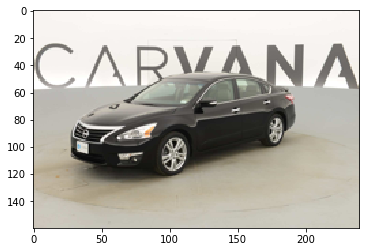

In [77]:
plt.imshow(img)

In [78]:
(pred[0,...] > 0.5).astype(np.uint8).shape

(160, 240, 1)

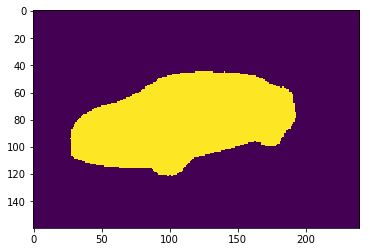

In [79]:
plt.imshow((pred[0,:,:,0] > 0.5).astype(np.uint8))